In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
s_w_c_production_df =pd.read_csv(r"P:\Paritosh_personal\data science\data science\Capstone Project ML-O_N_D\state_wise_crop_production.csv")

In [3]:
s_w_c_production_df.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


Data Exploration


In [4]:
s_w_c_production_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


In [5]:
s_w_c_production_df.describe()

,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
count,49.000000,49.000000,49.000000,49.000000
mean,20363.537347,31364.666735,1620.537755,98.086735
std,13561.435306,20095.783569,1104.990472,245.293123
min,5483.540000,7868.640000,85.790000,1.320000
25%,12774.410000,19259.840000,732.620000,9.590000
50%,17022.000000,25909.050000,1595.560000,13.700000
75%,24731.060000,35423.480000,2228.970000,36.610000
max,66335.060000,91442.630000,5777.480000,1015.450000


#To find the null values

In [6]:
s_w_c_production_df.isnull().sum()

Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64

In [7]:
s_w_c_production_df['Crop'].unique()

array(['ARHAR', 'COTTON', 'GRAM', 'GROUNDNUT', 'MAIZE', 'MOONG', 'PADDY',
       'RAPESEED AND MUSTARD', 'SUGARCANE', 'WHEAT'], dtype=object)

In [8]:
s_w_c_production_df['State'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Gujarat', 'Andhra Pradesh',
       'Maharashtra', 'Punjab', 'Haryana', 'Rajasthan', 'Madhya Pradesh',
       'Tamil Nadu', 'Bihar', 'Orissa', 'West Bengal'], dtype=object)

In [9]:
s_w_c_production_df.columns

Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare)'],
      dtype='object')

In [10]:
print(s_w_c_production_df.corr())

                                       Cost of Cultivation (`/Hectare) A2+FL  \
Cost of Cultivation (`/Hectare) A2+FL                               1.000000   
Cost of Cultivation (`/Hectare) C2                                  0.981225   
Cost of Production (`/Quintal) C2                                  -0.434422   
Yield (Quintal/ Hectare)                                            0.863400   

                                       Cost of Cultivation (`/Hectare) C2  \
Cost of Cultivation (`/Hectare) A2+FL                            0.981225   
Cost of Cultivation (`/Hectare) C2                               1.000000   
Cost of Production (`/Quintal) C2                               -0.497092   
Yield (Quintal/ Hectare)                                         0.866424   

                                       Cost of Production (`/Quintal) C2  \
Cost of Cultivation (`/Hectare) A2+FL                          -0.434422   
Cost of Cultivation (`/Hectare) C2                           

# data visualization

checking which crop has the highest yield

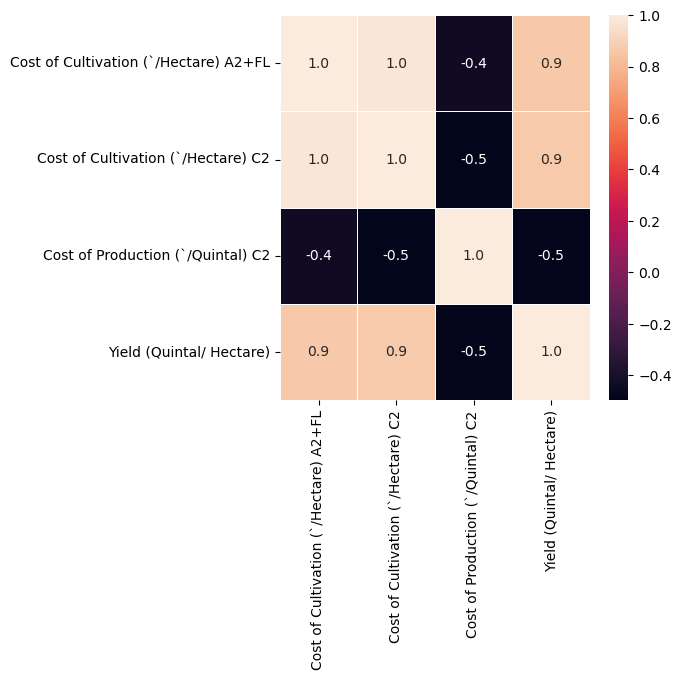

In [11]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(s_w_c_production_df.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

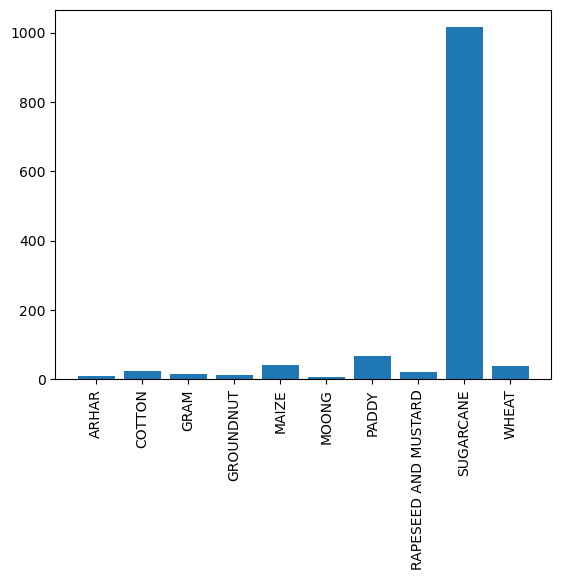

In [12]:
x=s_w_c_production_df["Yield (Quintal/ Hectare)"]
y=s_w_c_production_df ["Crop"]
plt.bar(y,x)
plt.xticks(rotation=90)
plt.show()

From the above plot we can conclude that the sugar cane crop has the highest yeild production in India


States with more agriculture

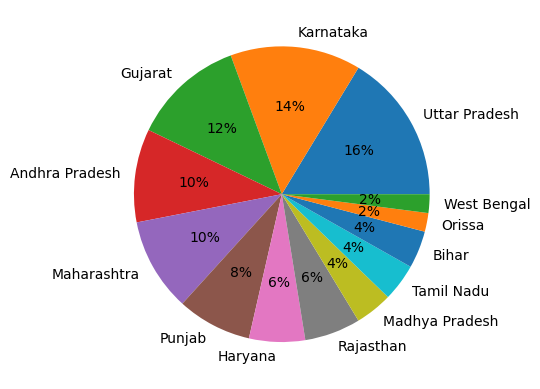

In [13]:
plt.pie(s_w_c_production_df["State"].value_counts(),autopct="%.f%%",labels=s_w_c_production_df["State"].unique())
plt.show()

Fromt the above diagram we can conclude that Karnataka has highest agriculture

comparing cost of cultivation and production in each state

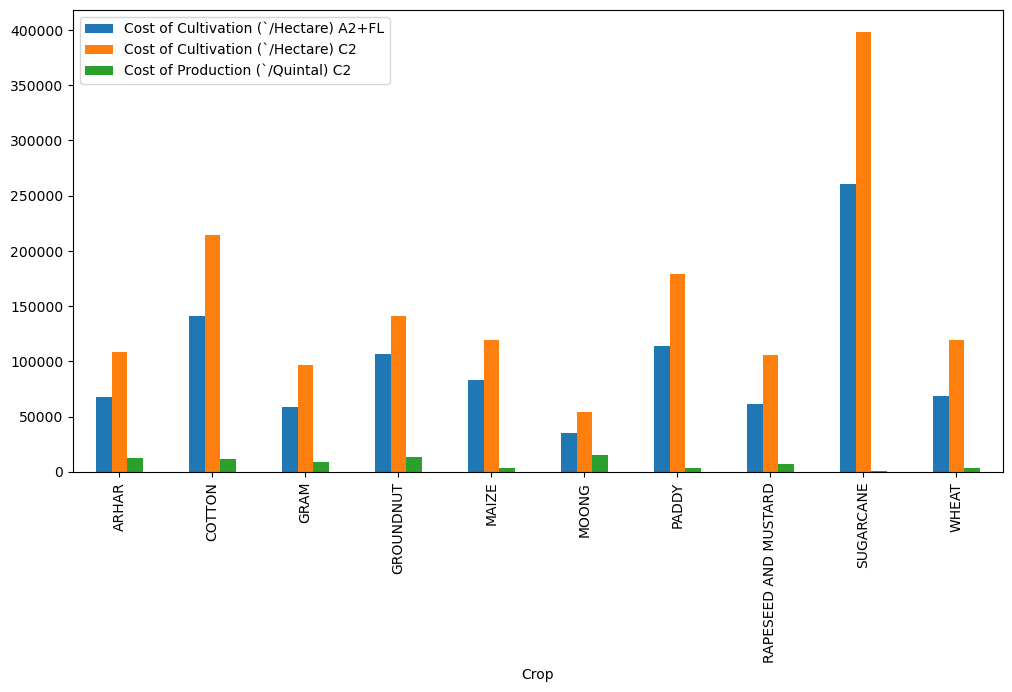

In [14]:
cols = s_w_c_production_df.columns
s_w_c_production_df.groupby('Crop')[cols[:-1]].sum().plot(kind='bar', figsize=(12,6));

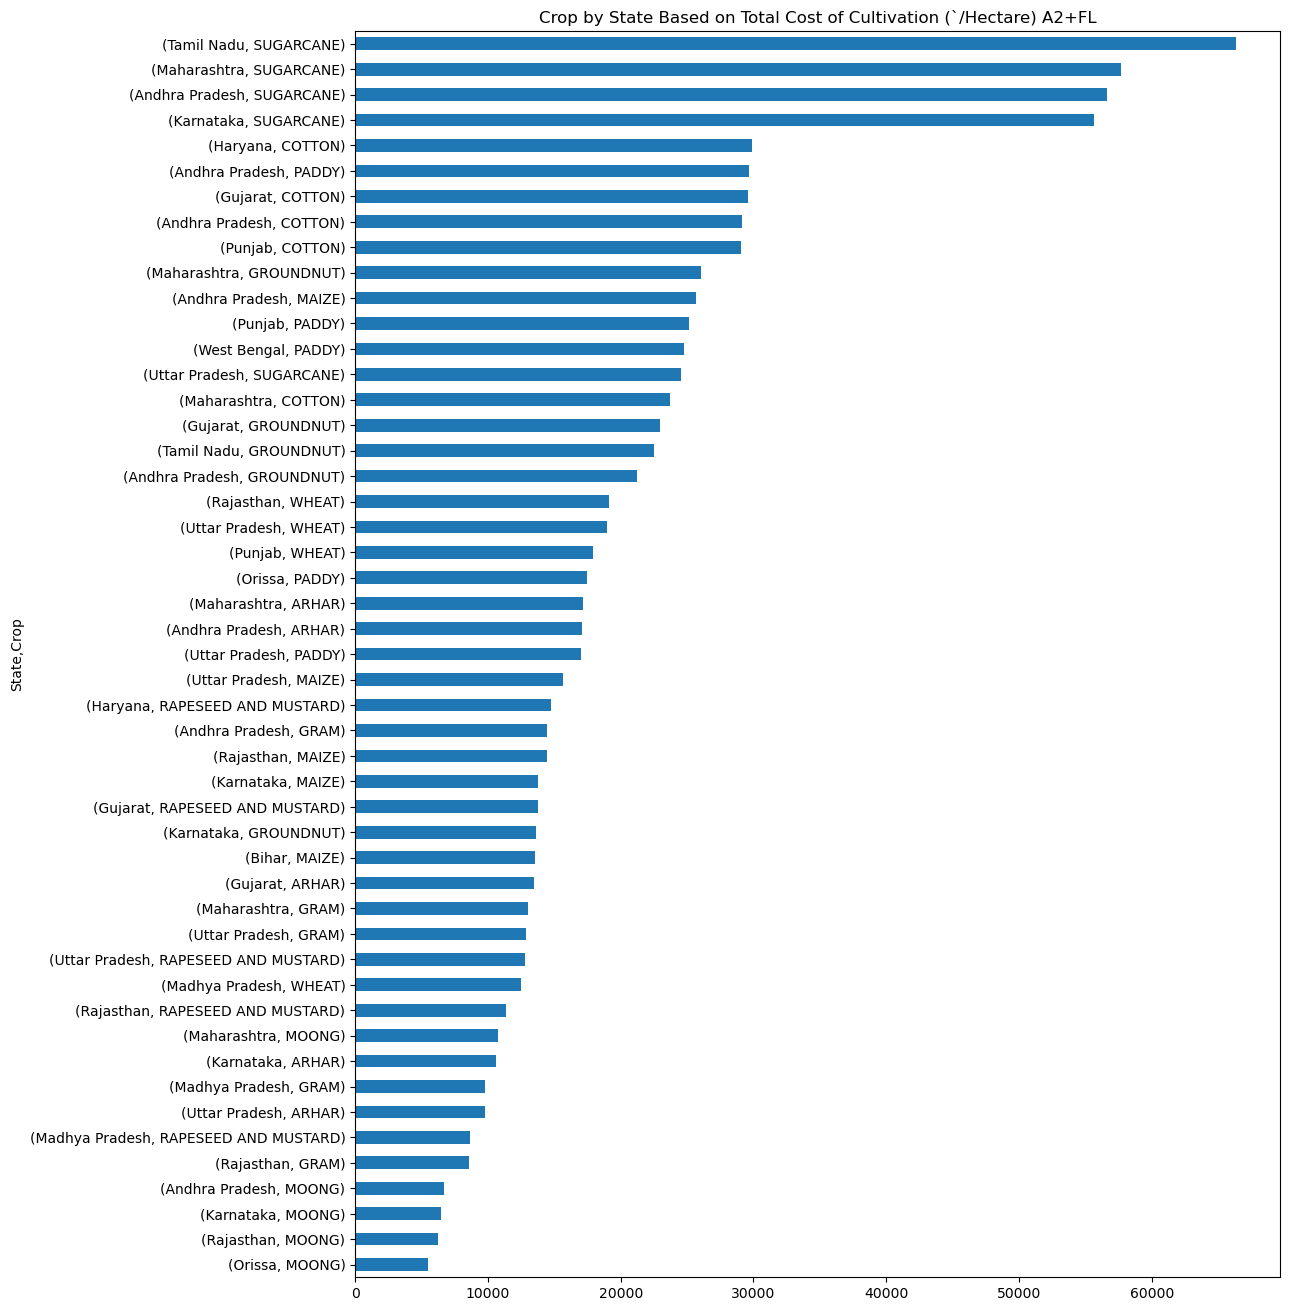

In [15]:
s_w_c_production_df.groupby(['State', 'Crop'])['Cost of Cultivation (`/Hectare) A2+FL'].sum().sort_values(ascending = True).plot(kind = 'barh',figsize = (13,13))
plt.tight_layout()
plt.title('Crop by State Based on Total Cost of Cultivation (`/Hectare) A2+FL')
plt.show()

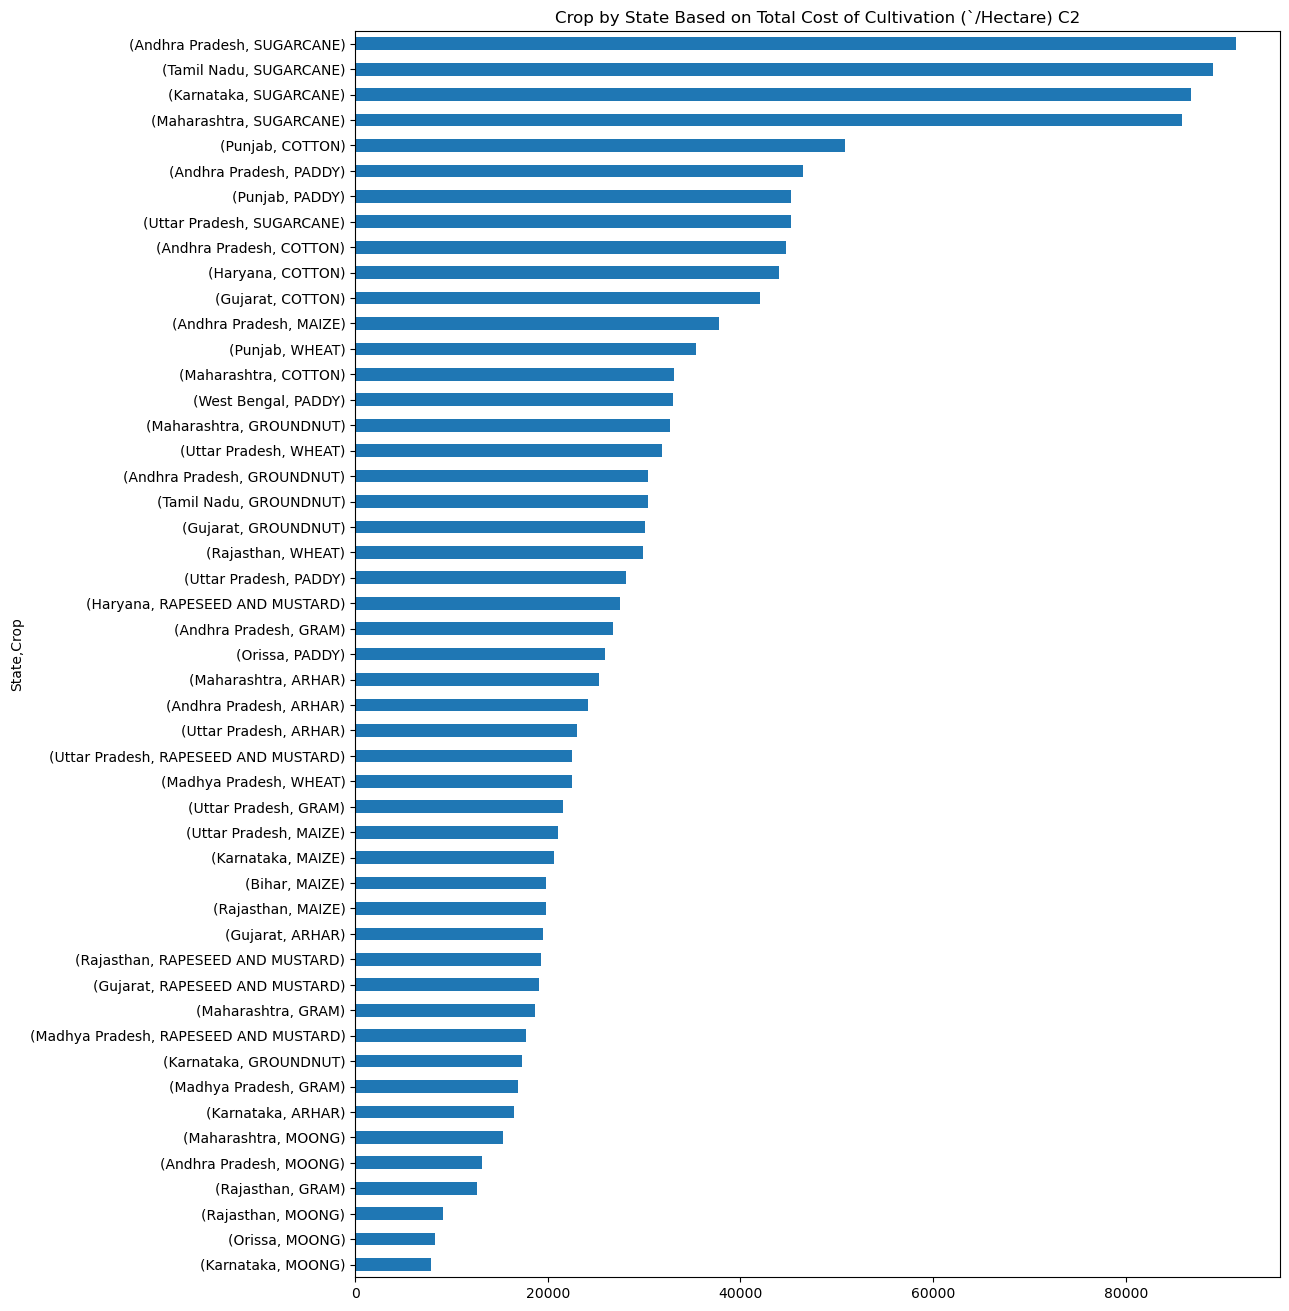

In [16]:
s_w_c_production_df.groupby(['State', 'Crop'])['Cost of Cultivation (`/Hectare) C2'].sum().sort_values(ascending = True).plot(kind = 'barh',figsize = (13,13))
plt.tight_layout()
plt.title('Crop by State Based on Total Cost of Cultivation (`/Hectare) C2')
plt.show()

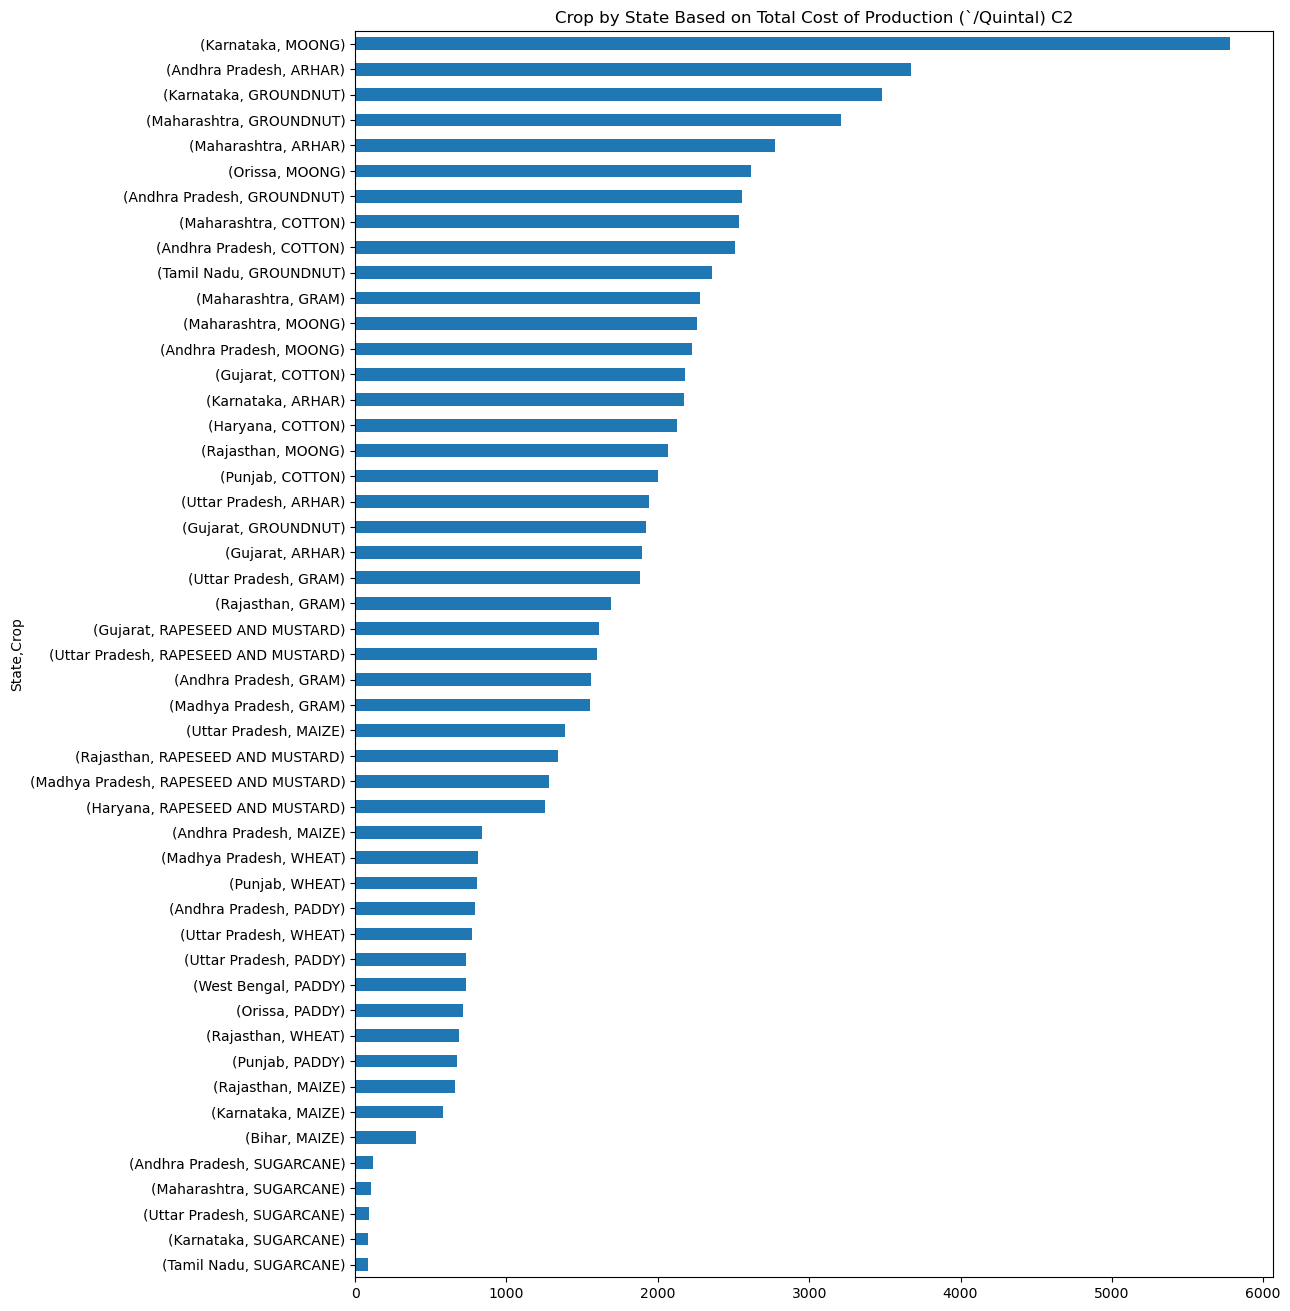

In [17]:
s_w_c_production_df.groupby(['State', 'Crop'])['Cost of Production (`/Quintal) C2'].sum().sort_values(ascending = True).plot(kind = 'barh',figsize = (13,13))
plt.tight_layout()
plt.title('Crop by State Based on Total Cost of Production (`/Quintal) C2')
plt.show()

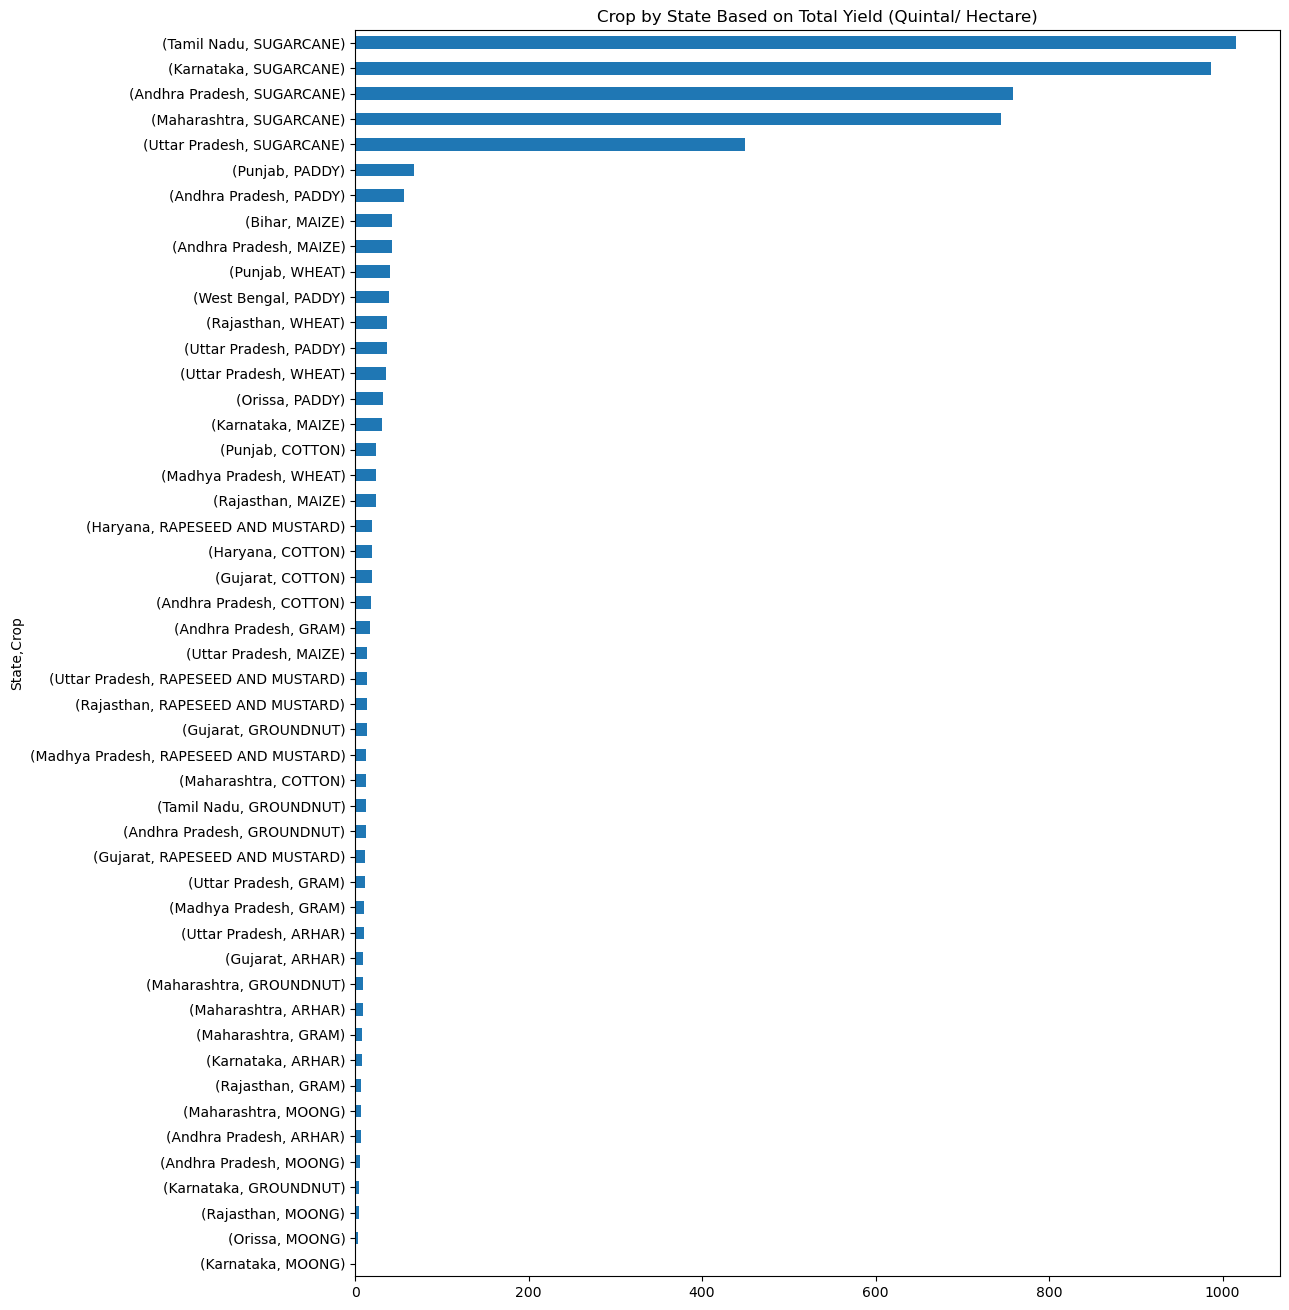

In [18]:
s_w_c_production_df.groupby(['State', 'Crop'])['Yield (Quintal/ Hectare)'].sum().sort_values(ascending = True).plot(kind = 'barh',figsize = (13,13))
plt.tight_layout()
plt.title('Crop by State Based on Total Yield (Quintal/ Hectare)')
plt.show()

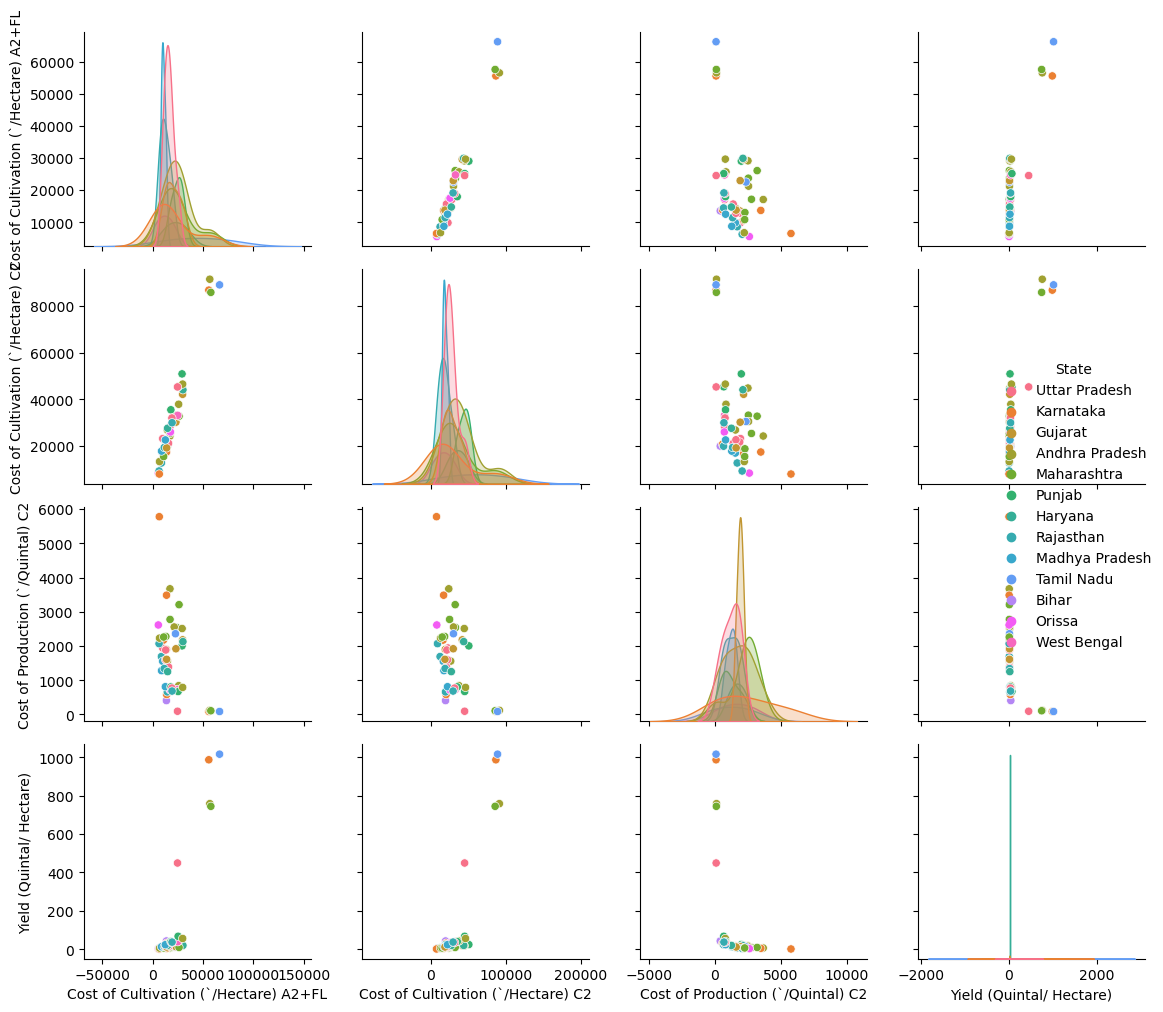

In [19]:
# pairplot based on state
sns.pairplot(s_w_c_production_df[['State','Cost of Cultivation (`/Hectare) A2+FL','Cost of Cultivation (`/Hectare) C2','Cost of Production (`/Quintal) C2','Yield (Quintal/ Hectare)']], hue = 'State')
plt.tight_layout()
plt.show()

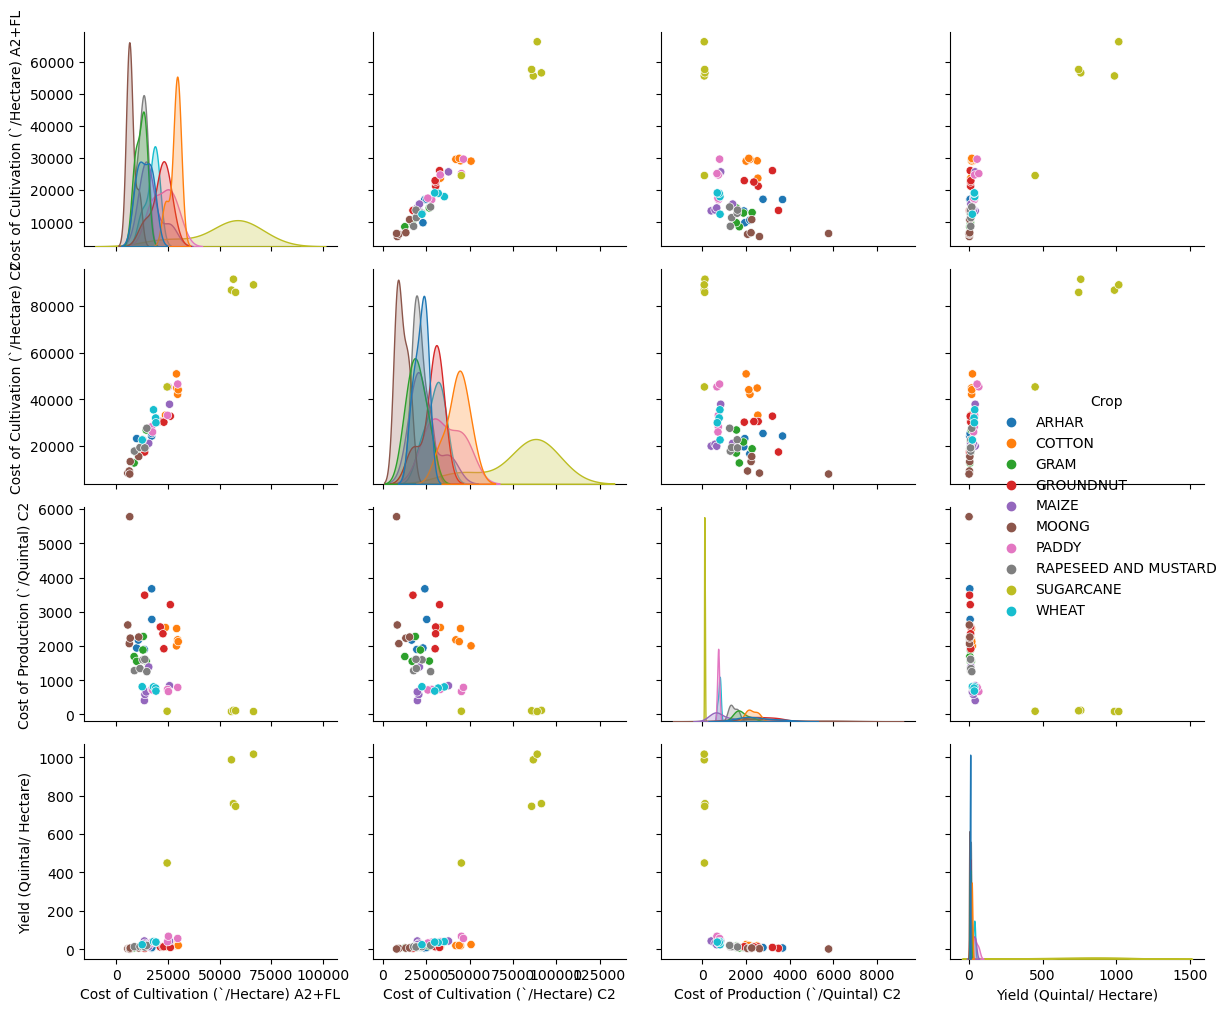

In [20]:
# pairplot based on Crop
sns.pairplot(s_w_c_production_df[['Crop', 'Cost of Cultivation (`/Hectare) A2+FL','Cost of Cultivation (`/Hectare) C2','Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare)']], hue = 'Crop')
plt.tight_layout()
plt.show()